<a href="https://colab.research.google.com/github/Zhrasa/python/blob/main/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import requests
import re
from bs4 import BeautifulSoup as Soup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
# function to get next urls
def get_next_page_url(url):
    response = requests.get(url)
    html = response.text
    soup = Soup(html, 'lxml')
    next_page_a = soup.find(class_='pager-next')
    if next_page_a is None:
        next_page_url = None
    else:
        next_page_url = next_page_a.get('href')
    return next_page_url


In [ ]:
# function to get all urls
def get_all_urls(start_url):
    continue_crawling = True
    job_urls = [start_url]

    while continue_crawling:
        next_page_url = get_next_page_url(start_url)
        if next_page_url is None:
            continue_crawling = False
        else:
            job_urls.append(next_page_url)
        start_url = next_page_url
    return job_urls




In [ ]:
pip install scrapy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install scrapydo

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for crochet>=1.4.0 from https://files.pythonhosted.org/packages/5c/18/b3543d7ad6333bdcd1a9397525e85415bbcd1ce055c3917a713373e99a21/crochet-2.1.1-py3-none-any.whl.metadata
  Created wheel for scrapydo: filename=scrapydo-0.2.2-py3-none-any.whl size=5818 sha256=cfe0b4c459d5cfb8451f3627ab87d098fff138e4245d76def884eebb0a44fd7c
  Stored in directory: c:\users\surface\appdata\local\pip\cache\wheels\a7\b5\a8\85fa972fac2e67430ab71fbb84ed633c0f67758797e3294c22
Successfully built scrapydo
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import io
import logging
from scrapy.linkextractors import LinkExtractor
from scrapy.spiders import Spider
from scrapy.crawler import CrawlerProcess
from scrapy import signals
from scrapy.signalmanager import dispatcher

# Set up logging
logging.getLogger('scrapy').setLevel(logging.INFO)
logging.getLogger('urllib3').setLevel(logging.WARNING)


class DataScienceJobsSpider(Spider):
    name = "data_science_jobs_spider"
    allowed_domains = ["findajob.dwp.gov.uk"]
    start_urls = ["https://findajob.dwp.gov.uk/search?loc=86383&p=1&q=data%20science"]

    def parse(self, response):
        # Extract links only from the pager items
        links = response.css("ul.pager-items a::attr(href)")

        # Writing links to the file
        with io.open("links.txt", "a", encoding="utf-8") as f:
            for link in links.extract():
                f.write(link + "\n")

        # Follow the next page link if available
        next_page_link = response.css("a.govuk-link.pager-next::attr(href)")
        if next_page_link:
            yield response.follow(next_page_link.get(), callback=self.parse)

if __name__ == "__main__":
    # Ensuring reactor stop is properly handled
    def crawler_stopped():
        reactor.stop()

    dispatcher.connect(crawler_stopped, signal=signals.spider_closed)

    try:
        process = CrawlerProcess()
        process.crawl(DataScienceJobsSpider)
        process.start()
    except Exception as e:
        logging.error("Error occurred: ", exc_info=True)
        if reactor.running:
            reactor.stop()


2024-06-18 19:21:29 [scrapy.utils.log] INFO: Scrapy 2.9.0 started (bot: scrapybot)
2024-06-18 19:21:29 [scrapy.utils.log] INFO: Versions: lxml 4.9.2.0, libxml2 2.9.12, cssselect 1.2.0, parsel 1.8.1, w3lib 2.1.1, Twisted 22.10.0, Python 3.10.6 (tags/v3.10.6:9c7b4bd, Aug  1 2022, 21:53:49) [MSC v.1932 64 bit (AMD64)], pyOpenSSL 23.2.0 (OpenSSL 3.1.1 30 May 2023), cryptography 41.0.1, Platform Windows-10-10.0.22635-SP0
2024-06-18 19:21:29 [scrapy.crawler] INFO: Overridden settings:
{}
2024-06-18 19:21:29 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2024-06-18 19:21:29 [scrapy.extensions.telnet] INFO: Telnet Password: b05a5ed7dd7b4063
2024-06-18 19:21:29 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2024-06-18 19:21:29 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMid

In [ ]:
# test
start_url = 'https://findajob.dwp.gov.uk/search?loc=86383&p=1&q=data%20science'
get_all_urls(start_url)

['https://findajob.dwp.gov.uk/search?loc=86383&p=1&q=data%20science',
 'https://findajob.dwp.gov.uk/search?loc=86383&q=data%20science&page=2',
 'https://findajob.dwp.gov.uk/search?loc=86383&q=data%20science&page=3',
 'https://findajob.dwp.gov.uk/search?loc=86383&q=data%20science&page=4',
 'https://findajob.dwp.gov.uk/search?loc=86383&q=data%20science&page=5',
 'https://findajob.dwp.gov.uk/search?loc=86383&q=data%20science&page=6',
 'https://findajob.dwp.gov.uk/search?loc=86383&q=data%20science&page=7',
 'https://findajob.dwp.gov.uk/search?loc=86383&q=data%20science&page=8',
 'https://findajob.dwp.gov.uk/search?loc=86383&q=data%20science&page=9',
 'https://findajob.dwp.gov.uk/search?loc=86383&q=data%20science&page=10',
 'https://findajob.dwp.gov.uk/search?loc=86383&q=data%20science&page=11',
 'https://findajob.dwp.gov.uk/search?loc=86383&q=data%20science&page=12',
 'https://findajob.dwp.gov.uk/search?loc=86383&q=data%20science&page=13',
 'https://findajob.dwp.gov.uk/search?loc=86383&q=d

In [ ]:
# function to get job details per page/url
def get_job_details(url):
    response = requests.get(url)
    html = response.text
    soup = Soup(html, 'lxml')
    results = soup.find_all(class_='search-result')

    titles = []
    dates = []
    locations = []
    salaries = []
    links = []

    for result in results:
        title = result.find('a').text.strip()
        date = result.find('li').text.strip()
        location = result.find_all('li')[1].text.strip()
        link = result.find('a').get('href')
        try:
            salary = result.find_all('li')[2].text.strip()
        except IndexError:
            salary = np.nan

        titles.append(title)
        dates.append(date)
        locations.append(location)
        salaries.append(salary)
        links.append(link)

    df = pd.DataFrame({'title':titles, 'date':dates, 'location':locations, 'salary':salaries, 'links':links})
    return df






In [ ]:
# function to get all page results
def get_all_results(start_url):
    all_urls = get_all_urls(start_url)
    dfs = []
    for url in tqdm(all_urls):
        df = get_job_details(url)
        dfs.append(df)
    df = pd.concat(dfs, axis=0, ignore_index=True)
    return df

In [ ]:
df = get_all_results(start_url)
df.head()


100%|██████████| 15/15 [00:03<00:00,  3.81it/s]


,title,date,location,salary,links
0,Data Scientist,31 May 2024,"AXA UK - IPSWICH, SUFFOLK, IP1 2AN","Up to £35,000 dependent on experience",https://findajob.dwp.gov.uk/details/14616961
1,Data Scientist,28 May 2024,"Tesco - None, None",Competitive,https://findajob.dwp.gov.uk/details/14573405
2,Data Scientist,18 June 2024,"Hastings Direct - London, London, ec1v1ne",Permanent,https://findajob.dwp.gov.uk/details/14719236
3,Data Scientist,11 June 2024,"NHS Jobs - Coventry, CV1 2WT","£50,952.00 to £57,349.00 per year",https://findajob.dwp.gov.uk/details/14679771
4,Data Scientist,11 June 2024,"NHS Jobs - Newcastle Upon Tyne, NE1 4WH","£50,952.00 to £57,349.00 per year",https://findajob.dwp.gov.uk/details/14679787


In [ ]:
df['title'].value_counts()


Data Lead                                                                12
Head of Business Intelligence and Data                                    7
Data Scientist                                                            6
Head of Computational Science and Engineering                             6
Project Manager | NHS Counter Fraud Authority                             3
                                                                         ..
Medical Laboratory Assistant | Kingston Hospital NHS Foundation Trust     1
Data Analyst                                                              1
Postdoctoral Researcher in Real World Evidence                            1
10670 - Events Administrator (CHAI Hub)                                   1
Principle Clinical Scientist                                              1
Name: title, Length: 98, dtype: int64

In [ ]:
# customise the url with options
def customise_url(base_url, kw, loc='', **kwargs):
    keywords = kw
    location = loc
    base_url = base_url
    start_url = f"{base_url}search?q={keywords}&w={location}"
    return start_url


In [ ]:
start_url = customise_url('https://findajob.dwp.gov.uk/', 'data+science')
df = get_all_results(start_url)

100%|██████████| 15/15 [00:04<00:00,  3.45it/s]


In [ ]:
df.head(2)
df.shape


(141, 5)

In [ ]:
start_url


'https://findajob.dwp.gov.uk/search?q=data+science&w='

In [ ]:
# get more job listings with simpler keyword 'data'
start_url = customise_url('https://findajob.dwp.gov.uk/', 'data')
df1 = get_all_results(start_url)

100%|██████████| 1340/1340 [07:14<00:00,  3.08it/s]


In [ ]:
df1.shape

(13395, 5)

In [ ]:
import pickle
with open('data_jobs.pickle', 'wb') as f:
    pickle.dump(df1, f)

In [ ]:
df1.head()

,title,date,location,salary,links
0,Data Analyst,20 May 2024,"Sugama Technologies Ltd - Aylesbury, Buckingha...","£33,200 to £35,000 per year",https://findajob.dwp.gov.uk/details/14546116
1,Data Engineer,18 June 2024,"Rullion - Nottingham, Nottinghamshire, NG1 4BX",£500 to £600 per day,https://findajob.dwp.gov.uk/details/14720397
2,Data Engineer,08 June 2024,"NatWest Group - Edinburgh, EH12 1HQ",Permanent,https://findajob.dwp.gov.uk/details/14663101
3,Data Engineer,08 June 2024,"NatWest Group - Manchester, M3 3AP",Permanent,https://findajob.dwp.gov.uk/details/14663104
4,Data Engineer,31 May 2024,"NatWest Group - Manchester, M3 3AP",Permanent,https://findajob.dwp.gov.uk/details/14613708


In [ ]:
# Data cleaning and transformation
# check dtypes
df1.dtypes

title       object
date        object
location    object
salary      object
links       object
dtype: object

In [ ]:
# check missing
df1.isna().sum()

title       0
date        0
location    0
salary      0
links       0
dtype: int64

In [ ]:
# describe as is
df1.describe(include='all')

,title,date,location,salary,links
count,13395,13395,13395,13395,13395
unique,9217,85,8247,4358,13394
top,Administrator,28 May 2024,Barking Havering and Redbridge University Hosp...,On-site only,https://findajob.dwp.gov.uk/details/14564938
freq,128,937,69,608,2


In [ ]:
# lower case all text
df1 = df1.apply(lambda x: x.str.lower() if x.dtype =='object' else x)
df1.head()

,title,date,location,salary,links
0,data analyst,20 may 2024,"sugama technologies ltd - aylesbury, buckingha...","£33,200 to £35,000 per year",https://findajob.dwp.gov.uk/details/14546116
1,data engineer,18 june 2024,"rullion - nottingham, nottinghamshire, ng1 4bx",£500 to £600 per day,https://findajob.dwp.gov.uk/details/14720397
2,data engineer,08 june 2024,"natwest group - edinburgh, eh12 1hq",permanent,https://findajob.dwp.gov.uk/details/14663101
3,data engineer,08 june 2024,"natwest group - manchester, m3 3ap",permanent,https://findajob.dwp.gov.uk/details/14663104
4,data engineer,31 may 2024,"natwest group - manchester, m3 3ap",permanent,https://findajob.dwp.gov.uk/details/14613708


In [ ]:
df1.describe(include='all')


,title,date,location,salary,links
count,13395,13395,13395,13395,13395
unique,9165,85,8166,4203,13394
top,administrator,28 may 2024,"uhcw nhs trust - coventry, cv2 2dx",on-site only,https://findajob.dwp.gov.uk/details/14564938
freq,129,937,70,608,2


In [ ]:
# convert column to datetime format
df1['date'] = pd.to_datetime(df1['date'], format='%d %B %Y')

# extract day, month, and year
df1['day'] = df1['date'].dt.day
df1['month'] = df1['date'].dt.month
df1['year'] = df1['date'].dt.year
df1['month_name'] = df1['date'].dt.strftime('%B')

df1.head()

,title,date,location,salary,links,day,month,year,month_name
0,data analyst,2024-05-20,"sugama technologies ltd - aylesbury, buckingha...","£33,200 to £35,000 per year",https://findajob.dwp.gov.uk/details/14546116,20,5,2024,May
1,data engineer,2024-06-18,"rullion - nottingham, nottinghamshire, ng1 4bx",£500 to £600 per day,https://findajob.dwp.gov.uk/details/14720397,18,6,2024,June
2,data engineer,2024-06-08,"natwest group - edinburgh, eh12 1hq",permanent,https://findajob.dwp.gov.uk/details/14663101,8,6,2024,June
3,data engineer,2024-06-08,"natwest group - manchester, m3 3ap",permanent,https://findajob.dwp.gov.uk/details/14663104,8,6,2024,June
4,data engineer,2024-05-31,"natwest group - manchester, m3 3ap",permanent,https://findajob.dwp.gov.uk/details/14613708,31,5,2024,May


In [ ]:
pip install scrapydo wordcloud

In [ ]:
from wordcloud import WordCloud
# concatenate all the text in the column into a single string
text = ' '.join(df1['title'].astype(str).tolist())

# create the wordcloud object
wordcloud = WordCloud(width=1500, height=800, background_color='white').generate(text)

# plot the wordcloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
# too many unrelated jobs
df1['title'].value_counts()

466


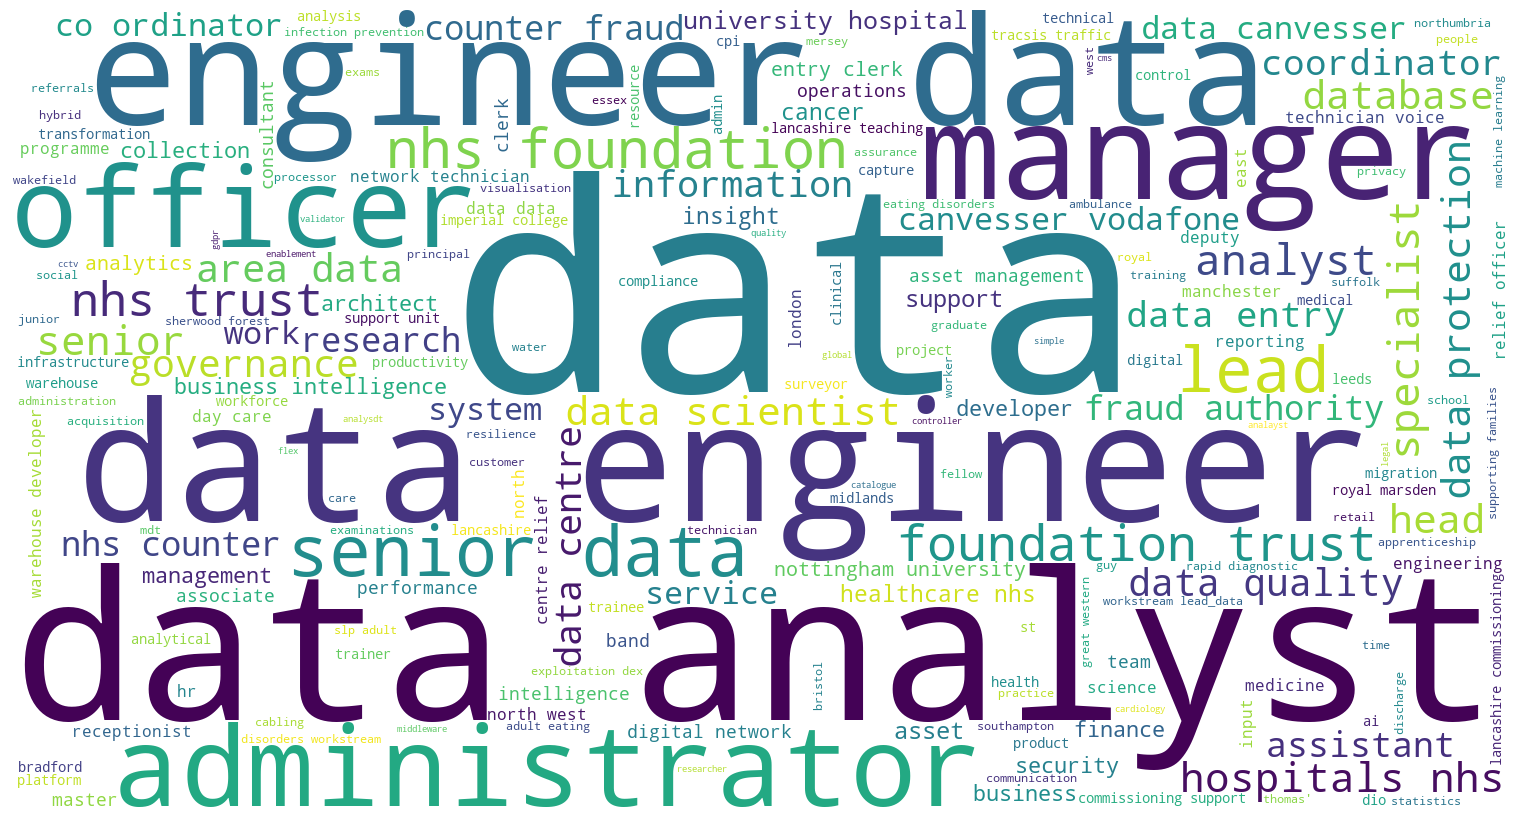

In [ ]:
# word cloud for only data jobs
data_jobs = df1[df1['title'].str.contains('data', case=False)]['title'].tolist()
print(len(data_jobs))
text1 = ' '.join(data_jobs)
# create the wordcloud object
wordcloud = WordCloud(width=1500, height=800, background_color='white').generate(text1)

# plot the wordcloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# create a data jobs only df
df2 = df1[df1['title'].str.contains('data', case=False)]
df2

,title,date,location,salary,links,day,month,year,month_name
0,data analyst,2024-05-20,"sugama technologies ltd - aylesbury, buckingha...","£33,200 to £35,000 per year",https://findajob.dwp.gov.uk/details/14546116,20,5,2024,May
1,data engineer,2024-06-18,"rullion - nottingham, nottinghamshire, ng1 4bx",£500 to £600 per day,https://findajob.dwp.gov.uk/details/14720397,18,6,2024,June
2,data engineer,2024-06-08,"natwest group - edinburgh, eh12 1hq",permanent,https://findajob.dwp.gov.uk/details/14663101,8,6,2024,June
3,data engineer,2024-06-08,"natwest group - manchester, m3 3ap",permanent,https://findajob.dwp.gov.uk/details/14663104,8,6,2024,June
4,data engineer,2024-05-31,"natwest group - manchester, m3 3ap",permanent,https://findajob.dwp.gov.uk/details/14613708,31,5,2024,May
...,...,...,...,...,...,...,...,...,...
3209,systems & database technical specialist | york...,2024-06-11,yorkshire ambulance service nhs trust - wakefi...,"£43,742 - £50,056 per annum",https://findajob.dwp.gov.uk/details/14676444,11,6,2024,June
4057,senior database engineer,2024-05-20,"hastings direct - hastings, east sussex, le1 1sh",permanent,https://findajob.dwp.gov.uk/details/14543900,20,5,2024,May
6260,cost consultant - datacentres,2024-06-17,morson talent - 68910,"£120,000 to £150,000 per year",https://findajob.dwp.gov.uk/details/14705911,17,6,2024,June
6573,it database administrator | east suffolk and n...,2024-05-27,colchester hospital university nhs foundation ...,"£35,392 - £42,618 per annum",https://findajob.dwp.gov.uk/details/14588198,27,5,2024,May


In [ ]:
# let's clean up the salary data
# formats: ['£23,029 to £23,500 per year', '£48526.00 to £54619.00 a year', '£24,715 to £26,642 per year, pro rata', '£56,164 - £65,262 pr pa', '£40,448 - £47,965 per annum inc', Competitive, NaN]
# Define regular expression patterns to extract salary information

def extract_salary(salary_str):
    if not isinstance(salary_str, str) or salary_str == '':
        return np.nan, np.nan
    else:
        currency_pattern = re.compile(r'£')

        # if no £ return nan
        if not currency_pattern.search(salary_str):
            return np.nan, np.nan
        else:
            yearly_pattern = re.compile(r'year|yr|annum|pa|yearly', re.IGNORECASE)
            hourly_pattern = re.compile(r'hr|hour|hourly', re.IGNORECASE)
            weekly_pattern = re.compile(r'week|wk|weekly|pw', re.IGNORECASE)
            monthly_pattern = re.compile(r'month|monthly|pm')
            salary_range_pattern = re.compile(r'£([\d,]+)')


            # check salary frequency
            frequency = ''
            if yearly_pattern.search(salary_str):
                frequency = 'year'
            if hourly_pattern.search(salary_str):
                frequency = 'hour'
            if weekly_pattern.search(salary_str):
                frequency = 'week'
            if monthly_pattern.search(salary_str):
                frequency = 'month'
            # print('frequency: ', frequency)

            # check range or single value
            is_range = False
            if len(currency_pattern.findall(salary_str)) == 2:
                is_range = True
            # print('is_range: ', is_range)

            # extract salary value
            salary_matches = salary_range_pattern.findall(salary_str)
            salaries = [float(match.replace(',', '')) for match in salary_matches]

            # calculate salaries min, max
            # if range
            if is_range:
                salaries = salaries
            else:
                salaries = [salaries[0], salaries[0]]

            if frequency == 'year':
                salaries = salaries
            if frequency == 'hour':
                salaries = [x*8*5*52 for x in salaries]
            if frequency == 'week':
                salaries = [x*52 for x in salaries]
            if frequency == 'month':
                salaries = [x*12 for x in salaries]

            # print(salaries)
            return salaries[0], salaries[1]


extract_salary("£230 per week")

(11960.0, 11960.0)

In [ ]:
# apply the function
df2[['salary_min', 'salary_max']] = df2['salary'].apply(extract_salary).apply(pd.Series)
df2.head()

2024-06-18 19:53:55 [py.warnings] WARNING: C:\Users\Surface\AppData\Local\Temp\ipykernel_1984\3589187523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['salary_min', 'salary_max']] = df2['salary'].apply(extract_salary).apply(pd.Series)

2024-06-18 19:53:55 [py.warnings] WARNING: C:\Users\Surface\AppData\Local\Temp\ipykernel_1984\3589187523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['salary_min', 'salary_max']] = df2['salary'].apply(extract_salary).apply(pd.Series)



,title,date,location,salary,links,day,month,year,month_name,salary_min,salary_max
0,data analyst,2024-05-20,"sugama technologies ltd - aylesbury, buckingha...","£33,200 to £35,000 per year",https://findajob.dwp.gov.uk/details/14546116,20,5,2024,May,33200.0,35000.0
1,data engineer,2024-06-18,"rullion - nottingham, nottinghamshire, ng1 4bx",£500 to £600 per day,https://findajob.dwp.gov.uk/details/14720397,18,6,2024,June,500.0,600.0
2,data engineer,2024-06-08,"natwest group - edinburgh, eh12 1hq",permanent,https://findajob.dwp.gov.uk/details/14663101,8,6,2024,June,NaN,NaN
3,data engineer,2024-06-08,"natwest group - manchester, m3 3ap",permanent,https://findajob.dwp.gov.uk/details/14663104,8,6,2024,June,NaN,NaN
4,data engineer,2024-05-31,"natwest group - manchester, m3 3ap",permanent,https://findajob.dwp.gov.uk/details/14613708,31,5,2024,May,NaN,NaN


In [ ]:
# show salary over date
sns.set(style="whitegrid")

def plot_date_salary(df):

    plt.figure(figsize=(12, 6))

    plot = sns.lineplot(x="date", y="salary_min", data=df, color='blue', label='Minimum Salary')
    sns.lineplot(x="date", y="salary_max", data=df, color='green', label='Maximum Salary')

    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

    # add axis labels and a title
    plt.xlabel("Date")
    plt.ylabel("Salary")
    plt.legend()
    plt.show()

plot_date_salary(df2)

Text(0, 0.5, 'Salary')

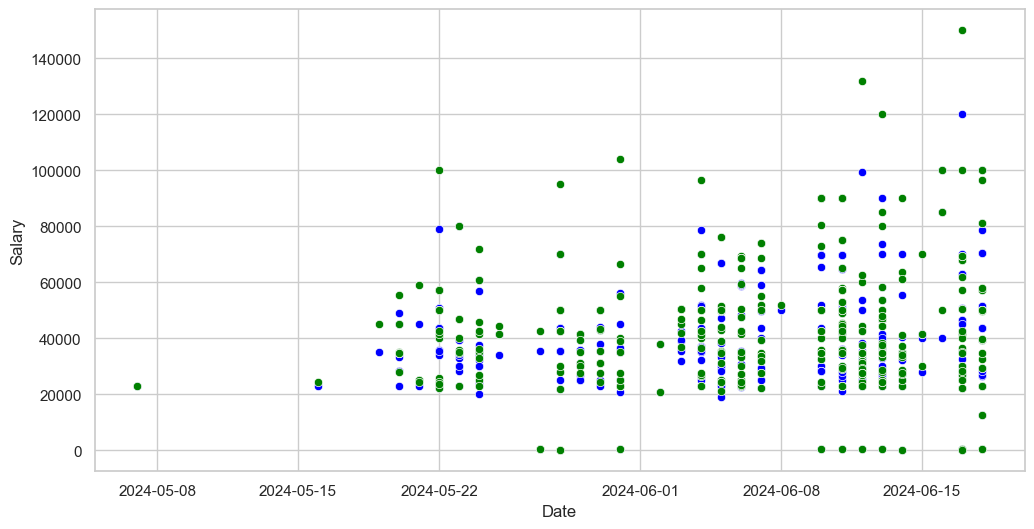

In [ ]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="date", y="salary_min", data=df2, color='blue')
sns.scatterplot(x="date", y="salary_max", data=df2, color='green')

# add axis labels and a title
plt.xlabel("Date")
plt.ylabel("Salary")


,title,date,location,salary,links,day,month,year,month_name,salary_min,salary_max
0,data analyst,2024-05-20,"sugama technologies ltd - aylesbury, buckingha...","£33,200 to £35,000 per year",https://findajob.dwp.gov.uk/details/14546116,20,5,2024,May,33200.0,35000.0
1,data engineer,2024-06-18,"rullion - nottingham, nottinghamshire, ng1 4bx",£500 to £600 per day,https://findajob.dwp.gov.uk/details/14720397,18,6,2024,June,500.0,600.0
2,data engineer,2024-06-08,"natwest group - edinburgh, eh12 1hq",permanent,https://findajob.dwp.gov.uk/details/14663101,8,6,2024,June,NaN,NaN
3,data engineer,2024-06-08,"natwest group - manchester, m3 3ap",permanent,https://findajob.dwp.gov.uk/details/14663104,8,6,2024,June,NaN,NaN
4,data engineer,2024-05-31,"natwest group - manchester, m3 3ap",permanent,https://findajob.dwp.gov.uk/details/14613708,31,5,2024,May,NaN,NaN


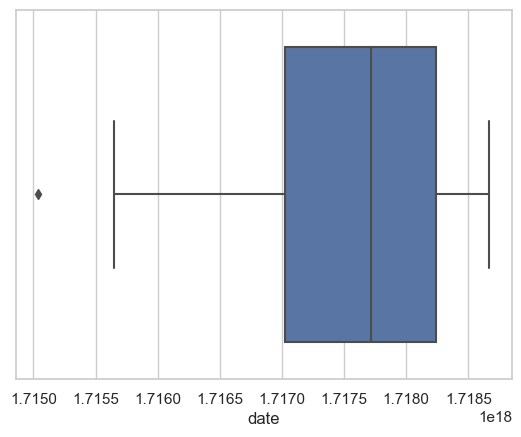

In [ ]:
sns.boxplot(x=pd.to_numeric(df2['date']))
# drop the troublesome date
df2 = df2[df2['date'] >= pd.to_datetime('2023-03')]
df2.head()

2024-06-18 19:54:19 [py.warnings] WARNING: C:\Users\Surface\AppData\Local\Temp\ipykernel_1984\3777282280.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)



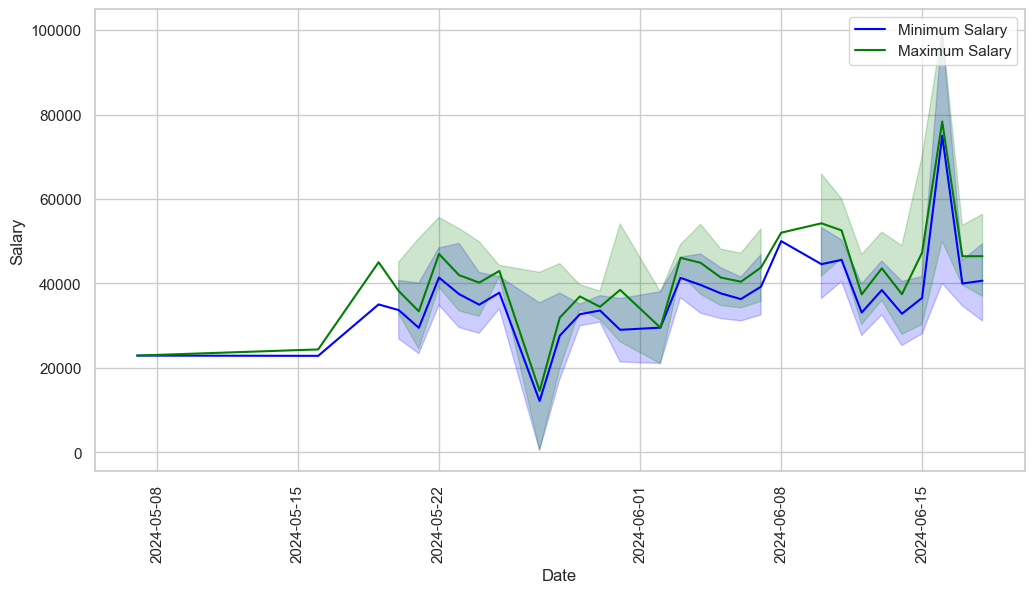

In [ ]:
plot_date_salary(df2)

In [ ]:
df2.head()


,title,date,location,salary,links,day,month,year,month_name,salary_min,salary_max
0,data analyst,2024-05-20,"sugama technologies ltd - aylesbury, buckingha...","£33,200 to £35,000 per year",https://findajob.dwp.gov.uk/details/14546116,20,5,2024,May,33200.0,35000.0
1,data engineer,2024-06-18,"rullion - nottingham, nottinghamshire, ng1 4bx",£500 to £600 per day,https://findajob.dwp.gov.uk/details/14720397,18,6,2024,June,500.0,600.0
2,data engineer,2024-06-08,"natwest group - edinburgh, eh12 1hq",permanent,https://findajob.dwp.gov.uk/details/14663101,8,6,2024,June,NaN,NaN
3,data engineer,2024-06-08,"natwest group - manchester, m3 3ap",permanent,https://findajob.dwp.gov.uk/details/14663104,8,6,2024,June,NaN,NaN
4,data engineer,2024-05-31,"natwest group - manchester, m3 3ap",permanent,https://findajob.dwp.gov.uk/details/14613708,31,5,2024,May,NaN,NaN


In [ ]:
df2.isna().sum()


title          0
date           0
location       0
salary         0
links          0
day            0
month          0
year           0
month_name     0
salary_min    60
salary_max    60
dtype: int64